<a href="https://colab.research.google.com/github/Geringer13/Netology_pyda/blob/master/ML_Time_Series4_%D0%9C%D0%B0%D1%80%D0%BA%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B5_%D1%86%D0%B5%D0%BF%D0%B8_Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
%matplotlib inline
sns.set()

In [0]:
with open('tom_1.txt', 'r') as f:
    text = f.read().lower()

In [0]:
text = re.sub('[^а-яё ]','', text)

In [0]:
r'[^а-яё ]'

In [0]:
text

'ну что князь генуа и лукка стали не больше как поместьями фамилии бонапарте нет я вас предупреждаю если вы мне не скажете что у нас война если вы еще позволите себе защищать все гадости все ужасы этого антихриста право я верю что он антихрист  я вас больше не знаю вы уж не друг мой вы уж не мой верный раб как вы говорите ну здравствуйте здравствуйте        я вижу что я вас пугаю садитесь и рассказывайтетак говорила в июле  года известная анна павловна шерер фрейлина и приближенная императрицы марии феодоровны встречая важного и чиновного князя василия первого приехавшего на ее вечер анна павловна кашляла несколько дней у нее был грипп как она говорила грипп был тогда новое слово употреблявшееся только редкими в записочках разосланных утром с красным лакеем было написано без различия во всех           или                                  если  вас граф или князь нет в виду ничего лучшего и если перспектива вечера у бедной больной не слишком вас пугает то я буду очень рада видеть вас ны

In [0]:
Russian = 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя '
POS = {l: i for i, l in enumerate(Russian)}

In [0]:
probabilities = np.zeros((len(Russian), len(Russian)))

In [0]:
for cp, cn in zip(text[:-1], text[1:]):
    probabilities[POS[cp], POS[cn]] += 1

In [0]:
probabilities = (probabilities / probabilities.sum(axis=1)[:, None])

In [0]:
df = pd.DataFrame(probabilities, index=(c for c in Russian), columns=(c for c in Russian))

Постройте матрицу переходных вероятностей

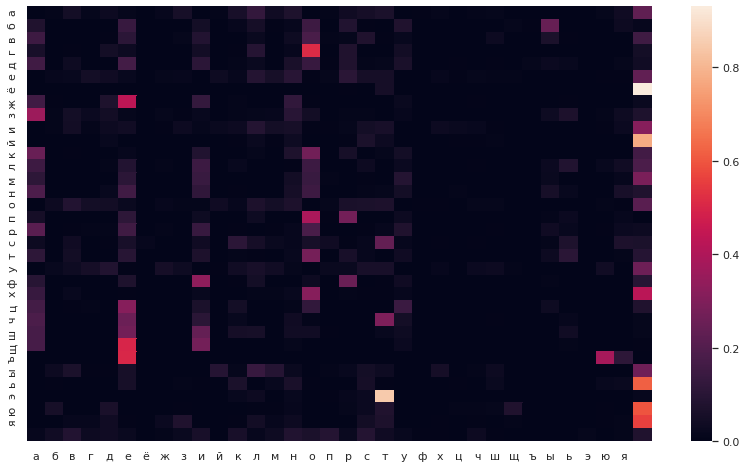

In [0]:
plt.figure(figsize=(14,8))
sns.heatmap(df)
plt.show()

Посчитайте вероятность встретить строку из 4-х символов, которая начинается п, а кончается на р

In [0]:
start = POS['п']
end = POS['р']
prior = 1. / len(Russian)
for c in Russian:
    proba = prior * probabilities[start, POS[c]] * probabilities[POS[c], end]
    for b in Russian:
      proba = prior * probabilities[start, POS[b]] * probabilities[POS[b], end]
      if proba > 0:
        print(''.join(['п', c, b, 'р']), proba)

паар 6.0071938075771455e-05
пагр 1.4801010824984223e-06
паер 0.0003364721125142651
паир 1.2124540253146925e-05
пакр 4.833933081788134e-06
панр 5.5969268272062406e-08
паор 0.0007472734611627388
папр 2.973595785796546e-05
парр 1.0519135095674165e-05
паср 2.5570331925125828e-08
патр 3.867607478766302e-06
паур 2.220583310973056e-05
пафр 5.393673436805564e-07
пачр 2.027826817582776e-08
пашр 6.686036984997011e-09
паыр 5.770821490775803e-06
паьр 2.2799691289991162e-07
паэр 7.573281896020533e-08
паяр 1.006347044106923e-06
па р 1.0504281189459635e-06
пбар 6.0071938075771455e-05
пбгр 1.4801010824984223e-06
пбер 0.0003364721125142651
пбир 1.2124540253146925e-05
пбкр 4.833933081788134e-06
пбнр 5.5969268272062406e-08
пбор 0.0007472734611627388
пбпр 2.973595785796546e-05
пбрр 1.0519135095674165e-05
пбср 2.5570331925125828e-08
пбтр 3.867607478766302e-06
пбур 2.220583310973056e-05
пбфр 5.393673436805564e-07
пбчр 2.027826817582776e-08
пбшр 6.686036984997011e-09
пбыр 5.770821490775803e-06
пбьр 2.2799691

Используя матрицу переходных вероятностей сгенерируйте слово, начинающееся с буквы “Б” и имеющее длину 8-мь символов

In [0]:
s = []
start = np.random.choice(list(Russian[1]))
s.append(start)
length = 8
for i in range(length):
    index = POS[s[i]]
    next_char = np.random.choice(list(Russian), p=probabilities[index])
    s.append(next_char)

print (''.join(s))

булофрани


Выберите ряд (файл во вложении) и оцените его через HMM. Попробуйте “построить” (через среднее каждой компоненты) наивный прогноз ряда.

In [23]:
pip install -U --user hmmlearn==0.2.1

     |████████████████████████████████| 153kB 2.8MB/s 
  Created wheel for hmmlearn: filename=hmmlearn-0.2.1-cp36-cp36m-linux_x86_64.whl size=353223 sha256=6f1f3e1fc04b54acaf06fa8d6425325dd60712bd47d11efb81c5f1747a0c6415
  Stored in directory: /root/.cache/pip/wheels/9a/a4/ee/917f0de81626b684fd2139ef5df47744c35ebeacc9e950487b
Successfully built hmmlearn
  Found existing installation: hmmlearn 0.2.3
    Uninstalling hmmlearn-0.2.3:
      Successfully uninstalled hmmlearn-0.2.3


In [24]:
from hmmlearn.hmm import GaussianHMM

ModuleNotFoundError: ignored

In [0]:
series = pd.read_csv("monthly-car-sales-in-quebec-1960.csv")["Count"]

In [0]:
values = series.values.reshape(-1,1)